<a href="https://colab.research.google.com/github/jahnavi1thoom/unsupervised-ml/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Mall_Customers.csv'
df=pd.read_csv(path)
df.head()


Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [7]:
#feature selection
x=df.iloc[:,3:].values


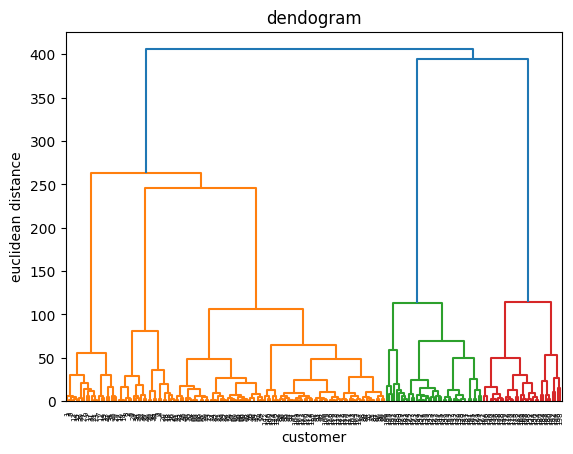

In [9]:
#plotting dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('dendogram')
plt.xlabel('customer')
plt.ylabel('euclidean distance')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

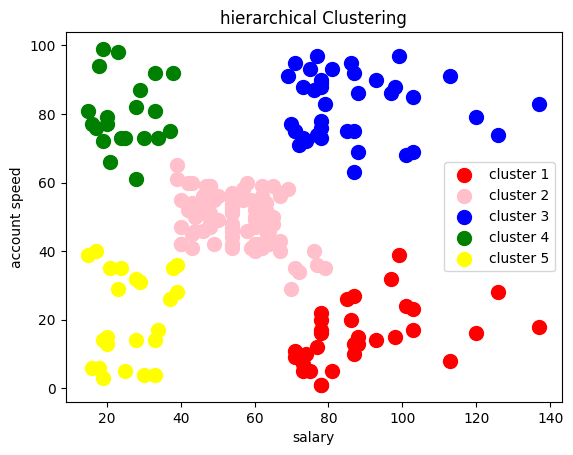

In [13]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='blue',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='green',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='yellow',label='cluster 5')
plt.xlabel('salary')
plt.ylabel('account speed')
plt.title('hierarchical Clustering')
plt.legend()
plt.show()

In [14]:
#metrrics for hierarchical clustering is silhouette score
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_hc)
print('silhouette score for hierarchical clustering:',score)

silhouette score for hierarchical clustering: 0.5529945955148897


**WORKING ON A DATASET**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/all-data.csv'
df1=pd.read_csv(path, encoding='latin1',header=None,engine='python')
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [21]:
df1.isna().sum()

,0
neutral,0
"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",0


In [42]:
df1.shape

(4846, 2)

In [44]:
df1.columns

Index([0, 1], dtype='int64')

In [45]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4841,False
4842,False
4843,False
4844,False


In [46]:
# First column = sentiment
sentiment_col = df1.iloc[:, 0]

# Remaining columns = parts of text
text_col = df1.iloc[:, 1:].astype(str).agg(' '.join, axis=1)

# Create clean dataframe
df_clean = pd.DataFrame({
    'sentiment': sentiment_col,
    'text': text_col
})

df1 = df_clean

print("Cleaned Shape:", df1.shape)
df1.head()


Cleaned Shape: (4846, 2)


,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [47]:
text_data = df1['text']



In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=1000
)

X = tfidf.fit_transform(text_data)

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (4846, 1000)


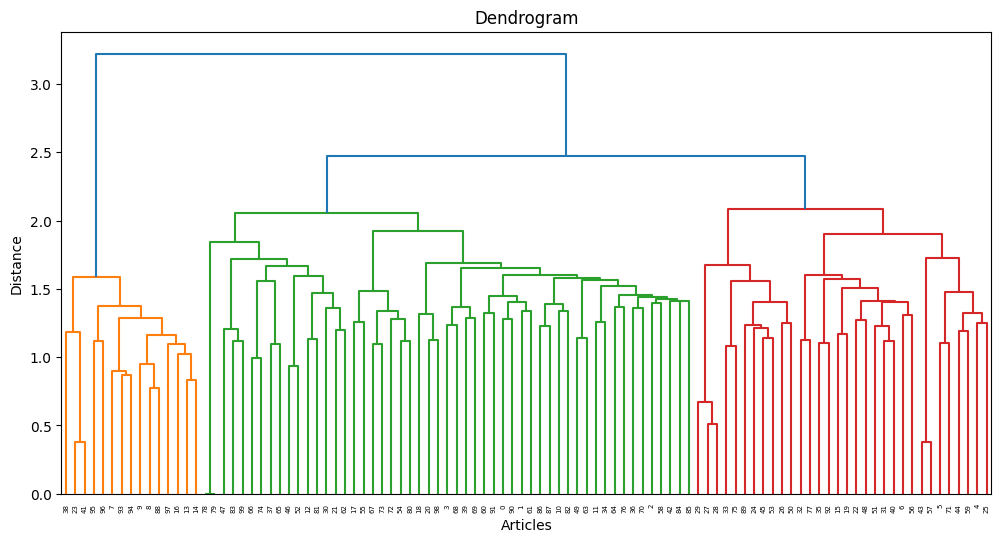

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Use subset
X_subset = X[:100].toarray()

linked = linkage(X_subset, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [52]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

print("Reduced Shape:", X_reduced.shape)


Reduced Shape: (4846, 100)


In [54]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

clusters = model.fit_predict(X_reduced)

df1['Cluster'] = clusters



In [ ]:
#plotting the custers
plt.scatter(X[clusters==0,0],x[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink',label='cluster 2')

plt.xlabel('salary')
plt.ylabel('account speed')
plt.title('hierarchical Clustering')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_reduced, clusters)
print("New Silhouette Score:", score)



New Silhouette Score: 0.17914962695656397
